3.1 Example - Convex & Non-Convex Function

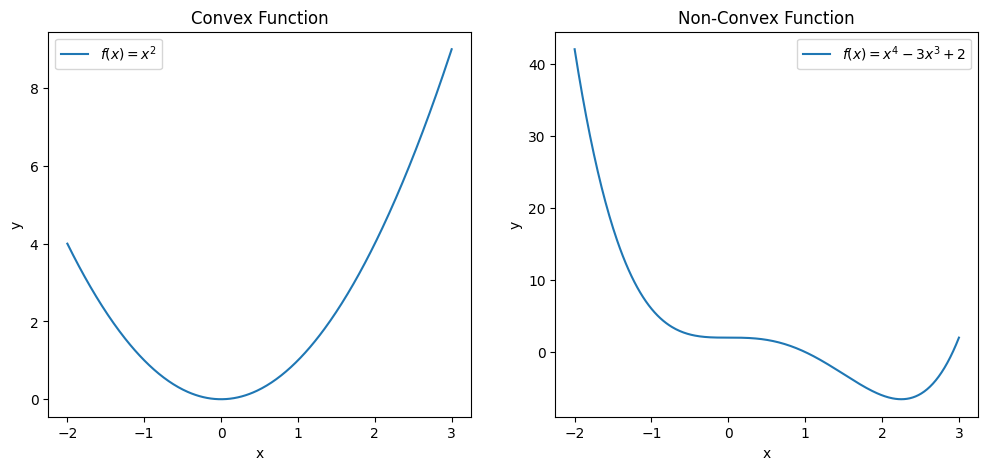

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Convex Function
def convex_f(x):
 return x**2

# Non-Convex Function
def non_convex_f(x):
  return x**4 - 3*x**3 + 2

x_values = np.linspace(-2, 3, 400)
convex_y_values = convex_f ( x_values )
non_convex_y_values = non_convex_f ( x_values )

plt.figure( figsize =(12 , 5) )

plt.subplot(1,2,1)
plt.plot ( x_values , convex_y_values , label ='$f(x) = x^2$')
plt.title('Convex Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.subplot(1,2,2)
plt.plot ( x_values , non_convex_y_values , label ='$f(x) = x^4 - 3x^3 + 2$')
plt.title('Non-Convex Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()

4 Gradient Descent Implementation

In [4]:
# Gradient of the Non - Convex Function
def grad_non_convex_f(x):
  return 4*x**3 - 9*x**2

# Gradient of the Convex Function
def grad_convex_f ( x ):
  return 2*x

# Gradient Descent Algorithm
def gradient_descent ( func , starting_point , learning_rate , iterations ):
  x = starting_point
  points = [x]
  for i in range(iterations):
    gradient = func(x)
    x = x - learning_rate * gradient
    points.append(x)
  return points

4.1 Visualize Gradient Descent on Example 1 (Convex Function)


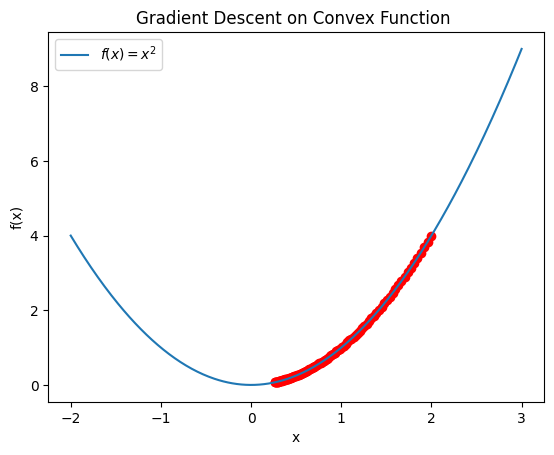

In [18]:
# Parameters
starting_point = 2
learning_rate = 0.01
iterations = 100

# Run Gradient Descent on f(x) = x^2
points = gradient_descent ( grad_convex_f , starting_point , learning_rate ,
iterations )

# Visualization
plt.plot(x_values, convex_y_values, label='$f(x) = x^2$')
plt.scatter(points, [convex_f(x) for x in points], color='red')
plt.title ('Gradient Descent on Convex Function ')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

plt.show()


4.2 Visualize Gradient Descent on Example 2 (Non-Convex Function)

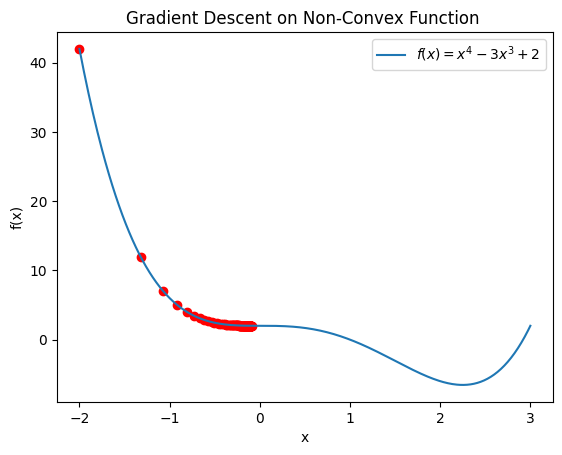

In [19]:
# Parameters
starting_point = -2
learning_rate = 0.01
iterations = 100

# Run Gradient Descent on f(x) = x^4 - 3x^3 + 2
points = gradient_descent (  grad_non_convex_f , starting_point , learning_rate ,
iterations )

# Visualization
plt.plot(x_values, non_convex_y_values, label='$f(x) = x^4 - 3x^3 + 2$')
plt.scatter(points, [non_convex_f(x) for x in points], color='red')
plt.title ('Gradient Descent on Non-Convex Function ')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

plt.show()

After updating the learning rate as 0.08, especially the Gradient Descent for convex function is significantly changed.

Note from Lab : In essence, we can state that gradient descent can struggle with non-convex functions due to local minima.
Additionally, its performance is highly dependent on the learning rate hyperparameter.

5.Modified Gradient Descent Algorithms

5.1  Gradient Descent with Momentum

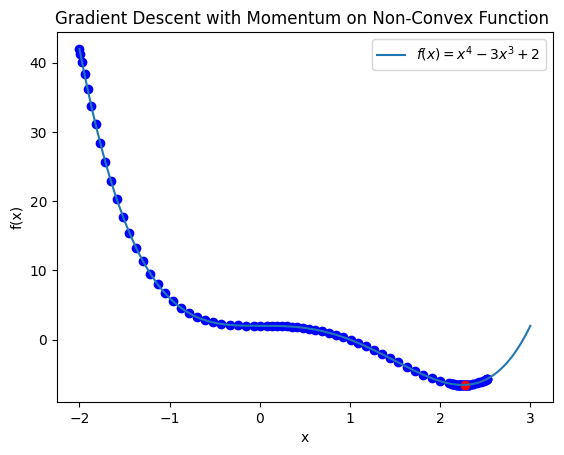

In [20]:
# Parameters
starting_point = -2
learning_rate = 0.01
iterations = 100

# Gradient Descent with Momentum
def gradient_descent_momentum ( func , starting_point , learning_rate ,
  iterations , momentum =0.9 , clip_value =1.0):
  x = starting_point
  velocity =0
  points = [x]
  for i in range (iterations):
    gradient = func(x)
    # Clip gradients to prevent overflow
    gradient = np . clip ( gradient , - clip_value , clip_value )
    velocity = momentum * velocity - learning_rate * gradient
    x = x+ velocity
    points.append(x)
  return points


# Run Gradient Descent with Momentum
points_momentum = gradient_descent_momentum (  grad_non_convex_f , starting_point , learning_rate , iterations )

# Visualization
plt.plot(x_values, non_convex_y_values, label='$f(x) = x^4 - 3x^3 + 2$')
plt.scatter(points_momentum [: -1], [non_convex_f(x) for x in points_momentum[: -1]], color='blue')
plt . scatter ( points_momentum [ -1] , [ non_convex_f ( points_momentum [ -1]) ] , color =
'red' )

plt.title ('Gradient Descent with Momentum on Non-Convex Function ')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

plt.show()

5.2 Adaptive Learning Rates: Adam Optimizer

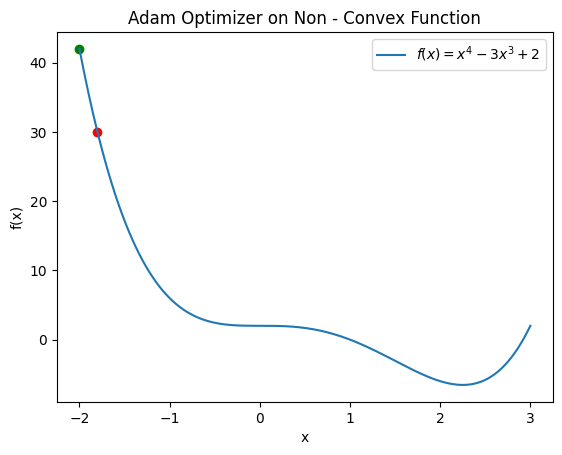

In [23]:
# Parameters
starting_point = -2
learning_rate = 0.2
iterations = 100

# Adam Optimizer
def adam_optimizer(func , starting_point , learning_rate , iterations , beta1 =0.9 , beta2 =0.999 , epsilon =1e-8):
  x = starting_point
  m,v = 0,0
  points = [x]
  for t in range (1 , iterations + 1) :
    gradient = func ( x )
    m = beta1 * m + (1 - beta1 ) * gradient
    v = beta2 * v + (1 - beta2 ) * ( gradient **2)
    m_hat = m / (1 - beta1 ** t )
    v_hat = v / (1 - beta2 ** t )
    x = x - learning_rate * m_hat / ( np . sqrt ( v_hat ) + epsilon )
    points.append(x)
    return points


 # Run Adam Optimizer
points_adam = adam_optimizer ( grad_non_convex_f , starting_point , learning_rate , iterations )


# Visualization
plt.plot(x_values, non_convex_y_values, label='$f(x) = x^4 - 3x^3 + 2$')
plt.scatter(points_adam [: -1] , [ non_convex_f ( x ) for x in points_adam [: -1]] ,color='green')
plt . scatter (  points_adam [ -1] , [ non_convex_f ( points_adam [ -1]) ] , color ='red' )

plt.title ('Adam Optimizer on Non - Convex Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

plt.show()